## trained model on TID2013

In [1]:
from scipy import stats



In [2]:
! python test_cross_dataset.py --help

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
usage: test_cross_dataset.py [-h] [--dist_dir DIST_DIR] [--ref_dir REF_DIR]
                             [--names_info NAMES_INFO]
                             [--model_file MODEL_FILE] [--save_path SAVE_PATH]
                             [--patching_method PATCHING_METHOD]

PyTorch WaDIQaM-FR test on the whole cross dataset

optional arguments:
  -h, --help            show this help message and exit
  --dist_dir DIST_DIR   distorted images dir.
  --ref_dir REF_DIR     reference images dir.
  --names_info NAMES_INFO
                        .mat file that includes image names in the dataset.
  --model_file MODEL_FILE
                        model file (default: checkpoints/WaDIQaM-FR-
                        KADID-10K-EXP1000-5-lr=0.0001-bs=4)
  --save_path SAVE_PATH
                        save path (default: scores)
  --patching_method PATCHING_METHOD
                        random or variance


## test on LIVE

In [3]:
%%time
! python test_cross_dataset.py --patching_method=variance  --dist_dir=databaserelease2  --model_file=SAVED_MODELS/variancePatch-WaDIQaM-NR-TID2013-EXP41-5-lr=0.0001-bs=4 --names_info=LIVEfullinfo.mat

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
500 @@@@@@@@@@@@@@@@@@@@@@@@@@ ['fastfading/img3.bmp', 'jpeg/img131.bmp', 'jp2k/img183.bmp', 'fastfading/img93.bmp', 'jpeg/img50.bmp', 'gblur/img104.bmp', 'gblur/img7.bmp', 'jpeg/img13.bmp', 'jp2k/img138.bmp', 'gblur/img38.bmp', 'fastfading/img40.bmp', 'jp2k/img192.bmp', 'gblur/img47.bmp', 'wn/img115.bmp', 'fastfading/img5.bmp', 'jp2k/img51.bmp', 'jpeg/img170.bmp', 'fastfading/img127.bmp', 'jp2k/img49.bmp', 'jp2k/img75.bmp', 'jpeg/img4.bmp', 'gblur/img107.bmp', 'jp2k/img44.bmp', 'jp2k/img5.bmp', 'fastfading/img77.bmp', 'wn/img140.bmp', 'wn/img125.bmp', 'jpeg/img25.bmp', 'jp2k/img135.bmp', 'wn/img61.bmp', 'wn/img96.bmp', 'fastfading/img51.bmp', 'wn/img95.bmp', 'jpeg/img83.bmp', 'jp2k/img172.bmp', 'jpeg/img106.bmp', 'fastfading/img99.bmp', 'fastfading/img26.bmp', 'wn/img27.bmp', 'fastfading/img19.bmp', 'fastfading/img57.bmp', 'gblur/img63.bmp', 'gblur/img53.bmp', 'wn/img131.bmp', 'jpeg/img160.bmp', 'wn/img128.bmp', 'jpeg/img119.b

In [4]:
import numpy as np
predicts = np.load('scores.npy')
predicts = 1 - predicts

In [5]:
import h5py

Info = h5py.File("LIVEfullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [6]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [7]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [9]:
len(predicts)

500

In [10]:
len(mos_)

500

In [11]:

stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.7403603374413498, pvalue=6.032456495536472e-88)

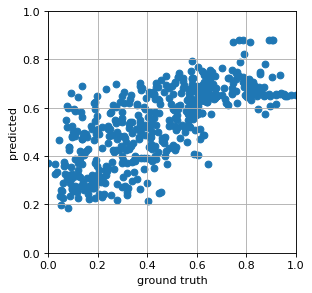

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## ON TID2013

In [13]:
%%time
! python test_cross_dataset.py --patching_method=variance  --dist_dir=distorted_images  --model_file=SAVED_MODELS/variancePatch-WaDIQaM-NR-TID2013-EXP41-5-lr=0.0001-bs=4 --names_info=TID2013fullinfo.mat

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
500 @@@@@@@@@@@@@@@@@@@@@@@@@@ ['i09_22_5.bmp', 'i13_04_4.bmp', 'i04_14_3.bmp', 'i17_15_5.bmp', 'i17_18_2.bmp', 'i02_16_1.bmp', 'i06_14_3.bmp', 'i21_21_1.bmp', 'i13_02_5.bmp', 'i12_09_2.bmp', 'i02_15_1.bmp', 'i11_08_4.bmp', 'i08_04_4.bmp', 'i20_04_5.bmp', 'i14_23_4.bmp', 'i20_01_5.bmp', 'i25_03_1.bmp', 'I21_11_1.BMP', 'i17_09_5.bmp', 'i02_17_4.bmp', 'i07_19_1.bmp', 'i21_01_2.bmp', 'i02_04_2.bmp', 'i24_21_3.bmp', 'i11_04_5.bmp', 'i07_13_2.bmp', 'i06_11_4.bmp', 'i14_02_5.bmp', 'i06_11_3.bmp', 'i06_02_3.bmp', 'i19_02_4.bmp', 'i08_01_3.bmp', 'i09_23_4.bmp', 'i15_23_5.bmp', 'i10_03_1.bmp', 'i13_08_5.bmp', 'i08_05_1.bmp', 'i22_18_5.bmp', 'i25_04_1.bmp', 'i19_01_5.bmp', 'i05_18_3.bmp', 'i25_18_1.bmp', 'i21_09_1.bmp', 'i07_18_2.bmp', 'i08_22_5.bmp', 'i24_24_3.bmp', 'i08_13_4.bmp', 'i14_06_4.bmp', 'i10_10_1.bmp', 'i03_12_1.bmp', 'I22_01_1.bmp', 'i07_07_4.bmp', 'i09_12_1.bmp', 'i11_09_3.bmp', 'i07_21_2.bmp', 'i05_21_2.bmp', 'i06_04_2.bmp


variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
variance----------------------
varianc

In [14]:
import numpy as np
predicts = np.load('scores.npy')

In [15]:
import h5py

Info = h5py.File("TID2013fullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [16]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [17]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [18]:
# predicts = 1 - predicts
len(predicts)

500

In [19]:
predicts[:10]

array([0.51959616, 0.71499413, 0.76222688, 0.52669775, 0.46710852,
       0.78942966, 0.7571159 , 0.69230354, 0.5994581 , 0.74714398])

In [20]:
mos_[:10]

[0.3768562117685871,
 0.7539231164813169,
 0.8316826742479163,
 0.5544551161652775,
 0.5651172880491359,
 0.8241905994907329,
 0.6613859437311225,
 0.7672106333402179,
 0.6468647642387539,
 0.7662264755090245]

In [21]:
len(mos_)

500

In [22]:
stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.8245716183292237, pvalue=2.795138161560941e-125)

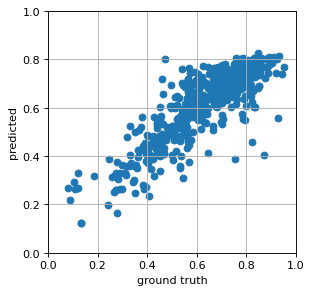

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## test on flipped images

In [24]:
from argparse import ArgumentParser
import torch
from torch import nn
import torch.nn.functional as F
from PIL import Image
from main import RandomCropPatches, VarianceThresholdPatchSelection, NRnet
import numpy as np
import h5py, os , random

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NRnet(weighted_average=True).to(device)

model.load_state_dict(torch.load("SAVED_MODELS/variancePatch-WaDIQaM-NR-TID2013-EXP41-5-lr=0.0001-bs=4"))

<All keys matched successfully>

In [26]:
import glob

im_names = glob.glob('flipped_test/*')
im_names

['flipped_test\\a.bmp',
 'flipped_test\\a1.png',
 'flipped_test\\b.bmp',
 'flipped_test\\b1.png',
 'flipped_test\\c.bmp',
 'flipped_test\\c1.png',
 'flipped_test\\d.bmp',
 'flipped_test\\d1.png',
 'flipped_test\\e.bmp',
 'flipped_test\\e1.png']

In [27]:
model.eval()
scores = []   
with torch.no_grad():
        for i in range(len(im_names)):
            im = Image.open(os.path.join( im_names[i])).convert('RGB')
            # ref = Image.open(os.path.join(args.ref_dir, ref_names[i])).convert('RGB')
            # data = RandomCropPatches(im, ref)
            data = VarianceThresholdPatchSelection(im)
            
            dist_patches = data.unsqueeze(0).to(device)
            # ref_patches = data[1].unsqueeze(0).to(device)
            # score = model((dist_patches, ref_patches))

            score = model((dist_patches))
            scores.append(score.item())


            
 

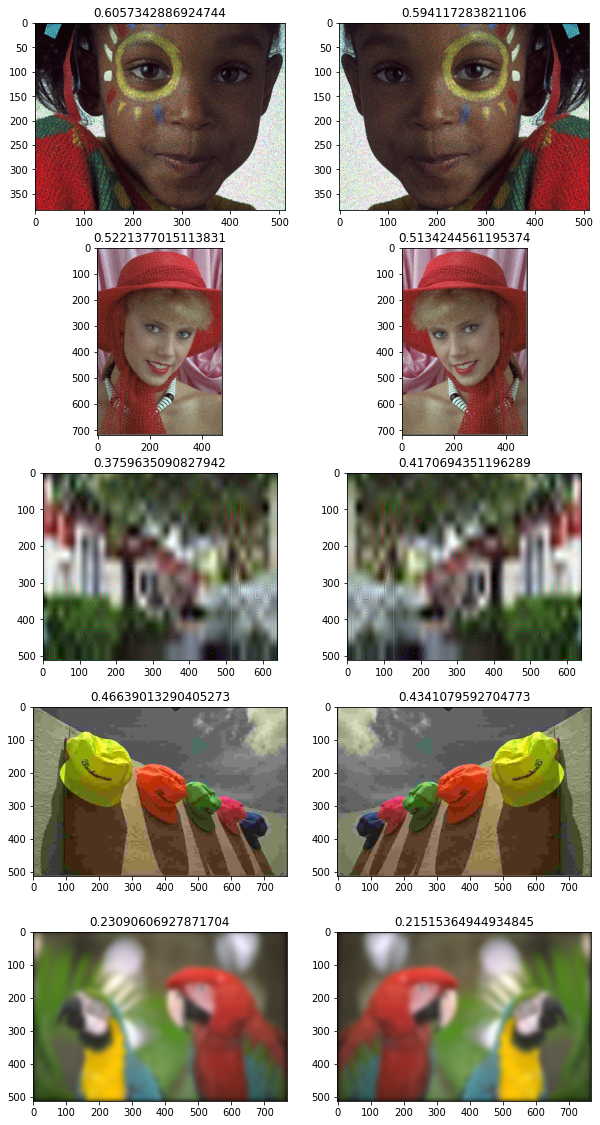

In [29]:
import cv2
f, axarr = plt.subplots(5,2 , figsize=(10, 20))
for i in range(len(im_names)//2):
    a = cv2.imread(im_names[i*2])
    b = cv2.imread(im_names[i*2+1])
    a = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
    b = cv2.cvtColor(b, cv2.COLOR_RGB2BGR)
    axarr[i,0].imshow(a)
    axarr[i,0].set_title(str(scores[i*2])) 
    axarr[i,1].imshow(b)
    axarr[i,1].set_title(str(scores[i*2+1])) 
  